In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix

In [6]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [7]:
type(X_train)

numpy.ndarray

In [11]:
print(X_train.shape)  #60000 images of 28 width, 28 height
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


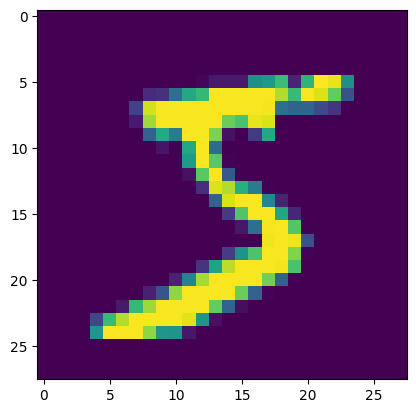

In [13]:
plt.imshow(X_train[0])

Image Labels

In [14]:
print(Y_train.shape)

(60000,)


In [18]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Scaling the Image

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Building ANN

In [28]:
model = Sequential()


model.add(Flatten(input_shape = (28,28)))

model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation = 'softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(X_train, Y_train, epochs=10, validation_data = (X_test, Y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8523 - loss: 0.5134 - val_accuracy: 0.9531 - val_loss: 0.1574
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9560 - loss: 0.1458 - val_accuracy: 0.9611 - val_loss: 0.1267
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9669 - loss: 0.1076 - val_accuracy: 0.9649 - val_loss: 0.1134
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9739 - loss: 0.0840 - val_accuracy: 0.9654 - val_loss: 0.1148
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9790 - loss: 0.0693 - val_accuracy: 0.9697 - val_loss: 0.0992
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9806 - loss: 0.0591 - val_accuracy: 0.9716 - val_loss: 0.0956
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9833 - loss: 0.0514 - val_accuracy: 0.9727 - val_loss: 0.0950
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9873 - loss: 0.0395 - 

In [32]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9654 - loss: 0.1386


Validation accuracy on Test data - 0.9654

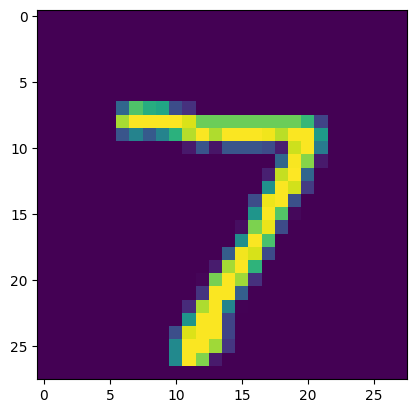

In [34]:
plt.imshow(X_test[0])

In [37]:
Y_test[0]

7

In [42]:
Y_prob = model.predict(X_test)
Y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.2653402e-08, 7.7907529e-08, 6.6892369e-07, ..., 9.9999732e-01,
        5.7496102e-10, 6.0154497e-07],
       [8.0804391e-12, 2.1853812e-06, 9.9999779e-01, ..., 1.7073887e-19,
        1.3278455e-11, 1.3974846e-20],
       [1.7187476e-08, 9.9996823e-01, 1.7450399e-06, ..., 2.6733815e-05,
        6.4114755e-07, 4.6619658e-07],
       ...,
       [9.6179786e-15, 2.5437313e-12, 2.7783673e-13, ..., 4.4752042e-09,
        5.3082263e-09, 1.8606408e-05],
       [1.2660368e-11, 5.8952765e-10, 8.3493434e-11, ..., 4.6791997e-11,
        8.3424112e-09, 7.7696767e-14],
       [4.5806508e-11, 1.6210013e-14, 2.2461247e-14, ..., 2.1559278e-18,
        1.4330235e-12, 2.5715576e-14]], dtype=float32)

In [44]:
Y_pred = np.argmax(Y_prob[0])  #give me index where highest probability
Y_pred

7

In [47]:
Y_pred = [np.argmax(i) for i in Y_prob]

In [52]:
confusion_matrix = (confusion_matrix(Y_pred, Y_test))

Text(0.5, 23.52222222222222, 'Predicted labels')

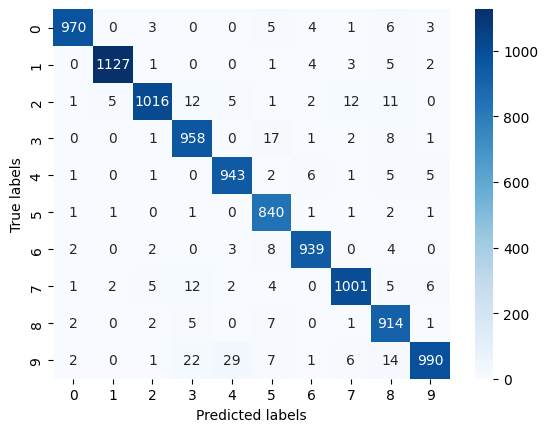

In [56]:
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred, Y_test)

0.9698

Building a predictive system

In [119]:
import cv2
image_path = '/content/sample_image.webp'
input_image = cv2.imread(image_path)

In [120]:
input_image

array([[[250, 250, 250],
        [250, 250, 250],
        [198, 198, 198],
        ...,
        [250, 250, 250],
        [255, 255, 255],
        [255, 255, 255]],

       [[250, 250, 250],
        [250, 250, 250],
        [198, 198, 198],
        ...,
        [250, 250, 250],
        [255, 255, 255],
        [255, 255, 255]],

       [[198, 198, 198],
        [198, 198, 198],
        [  0,   0,   0],
        ...,
        [198, 198, 198],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[228, 228, 228],
        [228, 228, 228],
        [  0,   0,   0],
        ...,
        [228, 228, 228],
        [255, 255, 255],
        [255, 255, 255]],

       [[221, 221, 221],
        [221, 221, 221],
        [  0,   0,   0],
        ...,
        [221, 221, 221],
        [255, 255, 255],
        [255, 255, 255]],

       [[221, 221, 221],
        [221, 221, 221],
        [  0,   0,   0],
        ...,
        [221, 221, 221],
        [255, 255, 255],
        [255, 255, 255]]

In [121]:
type(input_image)

numpy.ndarray

In [122]:
input_image.shape  #this is a rgb image while we have trained our model on greyscale image

(1480, 1490, 3)

In [123]:
greyscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
greyscale

array([[250, 250, 198, ..., 250, 255, 255],
       [250, 250, 198, ..., 250, 255, 255],
       [198, 198,   0, ..., 198, 255, 255],
       ...,
       [228, 228,   0, ..., 228, 255, 255],
       [221, 221,   0, ..., 221, 255, 255],
       [221, 221,   0, ..., 221, 255, 255]], dtype=uint8)

In [124]:
greyscale.shape

(1480, 1490)

In [125]:
input = cv2.resize(greyscale, (28,28))
input

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  80, 185, 157, 155,  59,  37,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 221, 255, 252, 255, 255, 244, 198,
        198, 198, 198, 198, 198, 198, 198, 167,  50,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 115,  68, 116, 160, 226, 254,
        224, 255, 254, 254, 250, 228, 252, 254, 135,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  63,
         12,  67,  67,  67,  59,  24, 234, 253, 104,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  80, 253, 206,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  20, 230, 255,  89,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 255, 231,  45,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 248, 255,  65,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 132, 254, 185,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7, 203, 249,  59,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 123, 254, 178,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  79, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         18, 221, 255, 167,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
        199, 251, 217,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37,
        255, 254,  76,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 226,
        251, 112,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 132, 253,
        253,  55,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [126]:
input.shape

(28, 28)

In [127]:
input = input/255  #resize

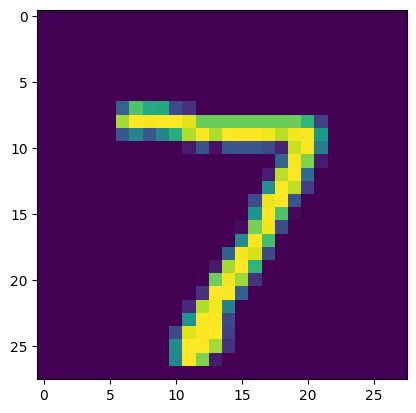

In [128]:
plt.imshow(input)  #greyscale image

In [129]:
input_reshaped = np.reshape(input, (1,28,28))
input_reshaped.shape

(1, 28, 28)

In [130]:
np.argmax(model.predict(input_reshaped))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


7